<img src="https://docs.actable.ai/_images/logo.png" style="object-fit: cover; max-width:100%; height:300px;" />

# AAIAssociationRulesTask

This notebook is an example on how you can run an association rules analysis automatically with
[Actable AI](https://actable.ai)

For this example we will analyse the associated bought items\
from clients in a store

For this example the dataset we are going to use is the [The Bread Basket dataset](https://www.kaggle.com/datasets/mittalvasu95/the-bread-basket?resource=download)

### Imports

This part simply imports the python modules.
Last line imports the ClassificationTask from actableai

In [11]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
from graphviz import Source

from actableai import AAIAssociationRulesTask

### Importing the data

This part imports the data and cut it into two parts.\
First part will be the data we use for training and second part
will be used to showcase the predictive power of the new generated model

In [2]:
df = pd.read_csv("data/bread basket.csv").head(100)
df.head(5)

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


### Calling Actable AI task

This part is the call to the ActableAI association rules analysis.\
To learn more about the available parameters you can consult the [API Documentation](https://lib.actable.ai/actableai.tasks.html#module-actableai.tasks.classification)

In [ ]:
# Here df is the DataFrame containing our data
# target is "Churn" because we want to predict the churn
# features set to None means that we will use every single feature available
result = AAIAssociationRulesTask().run(
    df=df,
    group_by=["Transaction"],
    items="Item",
    min_support=0.01,
)

### Interpreting the result

After running our analysis we can have a look at the associated items

In [8]:
result['data']['rules']

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
113,"(Coffee, Tea, Pastry, Jam)",(Tartine),0.020833,0.041667,0.020833,1.0,24.0,0.019965,inf
153,"(Cookies, Jam)",(Hot chocolate),0.020833,0.062500,0.020833,1.0,16.0,0.019531,inf
267,(Ella's Kitchen Pouches),"(Bread, Juice, Jam)",0.020833,0.020833,0.020833,1.0,48.0,0.020399,inf
143,"(Basket, Bread)",(Coffee),0.020833,0.312500,0.020833,1.0,3.2,0.014323,inf
144,"(Basket, Coffee)",(Bread),0.020833,0.416667,0.020833,1.0,2.4,0.012153,inf
...,...,...,...,...,...,...,...,...,...
164,"(Muffin, Juice)",(Tartine),0.041667,0.041667,0.020833,0.5,12.0,0.019097,1.916667
166,(Tartine),"(Muffin, Juice)",0.041667,0.041667,0.020833,0.5,12.0,0.019097,1.916667
167,(Juice),"(Muffin, Tartine)",0.041667,0.020833,0.020833,0.5,24.0,0.019965,1.958333
168,"(Coffee, Tartine)",(Juice),0.041667,0.041667,0.020833,0.5,12.0,0.019097,1.916667


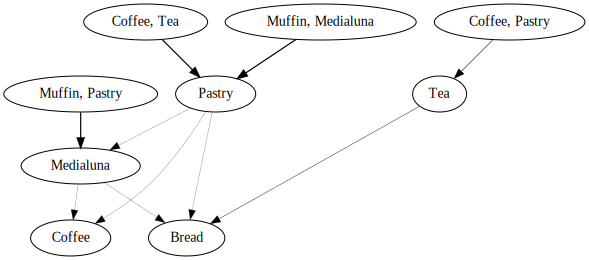

In [17]:
Source(result['data']['graph'], filename="test.gv", format="png")